In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

In [2]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
from utils import train_transforms, test_transforms, visualise_transformation

In [4]:
from torchvision import datasets
train_data= datasets.CIFAR10(root= '../data', train= True, download= True, transform= train_transforms)
test_data= datasets.CIFAR10(root= '../data', train= False, download= True, transform= test_transforms)

100%|██████████| 170498071/170498071 [00:05<00:00, 28733618.32it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [5]:
dataloader_args= dict(shuffle= True, batch_size= 64, num_workers= 2, pin_memory= True) if torch.cuda.is_available() else dict(shuffle= True, batch_size= 64)
train_loader= torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader= torch.utils.data.DataLoader(test_data, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


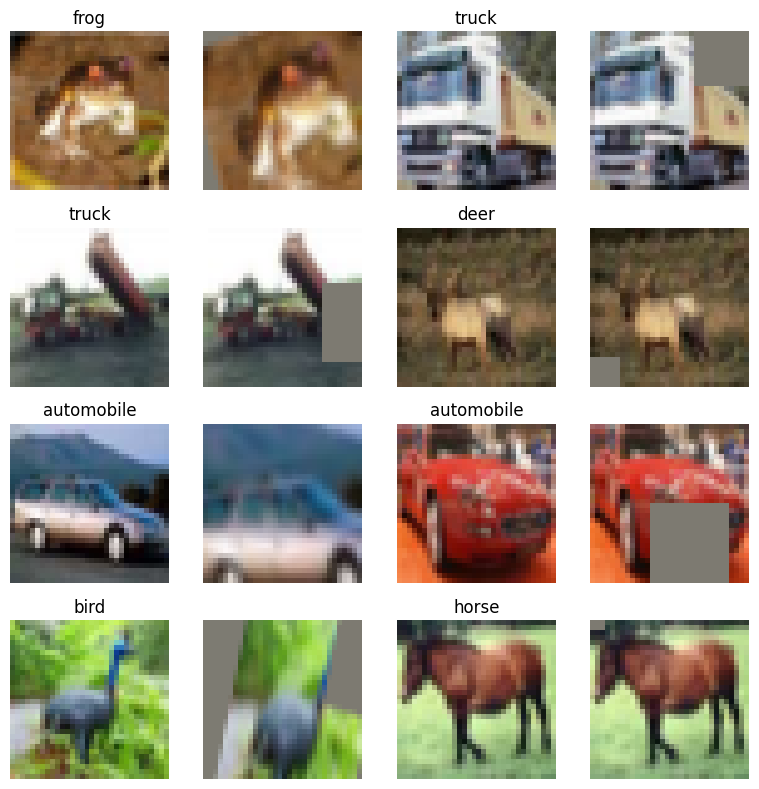

In [6]:
visualise_transformation()

In [7]:
from model import Net
model= Net().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
              ReLU-5          [-1, 128, 32, 32]               0
       BatchNorm2d-6          [-1, 128, 32, 32]             256
         MaxPool2d-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
              ReLU-9          [-1, 128, 16, 16]               0
      BatchNorm2d-10          [-1, 128, 16, 16]             256
           Conv2d-11          [-1, 128, 16, 16]         147,456
             ReLU-12          [-1, 128, 16, 16]               0
      BatchNorm2d-13          [-1, 128, 16, 16]             256
           Conv2d-14          [-1, 256,

/content/model.py:55: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [8]:
from train_test import train, test

In [10]:
!pip install torch_lr_finder

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.04E-05


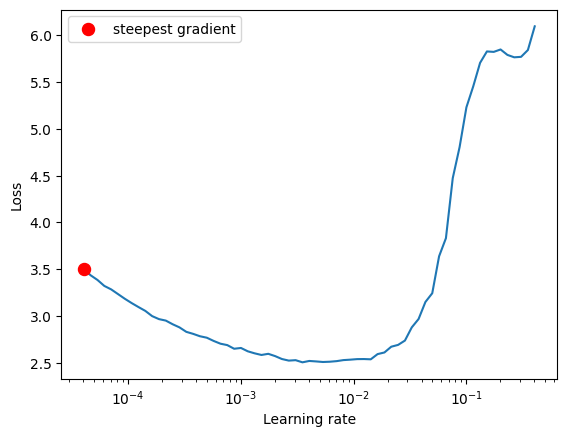

In [12]:
from torch_lr_finder import LRFinder

optimizer = optim.Adam(model.parameters(), lr=0.00001)
lr_finder = LRFinder(model, optimizer, criterion=nn.CrossEntropyLoss(), device='cuda')

lr_finder.range_test(train_loader, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

In [14]:
from torch.optim.lr_scheduler import OneCycleLR

epochs = 20
optimizer = optim.Adam(model.parameters(), lr=4.04E-05)
# Initialize the OneCycleLR scheduler
scheduler = OneCycleLR(optimizer, max_lr=4.04E-04, epochs=epochs, steps_per_epoch=len(train_loader))

learning_rate=[]
train_accuracy=[]
test_accuracy=[]
train_losses=[]
test_losses=[]

for epoch in range(1, epochs + 1):
    print("EPOCH:", epoch)

    print('Learning rate:', optimizer.param_groups[0]['lr'],'\n')
    learning_rate.append(optimizer.param_groups[0]['lr'])

    train_acc,train_loss= train(model, device, train_loader, optimizer,scheduler)
    test_acc,test_loss= test(model, device, test_loader)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

EPOCH: 1
Learning rate: 1.615999999999998e-05 



Loss=1.354248285293579 Accuracy=40.31: 100%|██████████| 782/782 [00:34<00:00, 22.79it/s]



Test set: Average loss: 0.0195, Accuracy: 5622/10000 (56.22%)

EPOCH: 2
Learning rate: 4.215117719942569e-05 



Loss=1.2511258125305176 Accuracy=51.36: 100%|██████████| 782/782 [00:34<00:00, 22.37it/s]



Test set: Average loss: 0.0169, Accuracy: 6233/10000 (62.33%)

EPOCH: 3
Learning rate: 0.00011315749250013726 



Loss=1.6064635515213013 Accuracy=56.92: 100%|██████████| 782/782 [00:40<00:00, 19.51it/s]



Test set: Average loss: 0.0138, Accuracy: 6902/10000 (69.02%)

EPOCH: 4
Learning rate: 0.00021014493472990822 



Loss=1.1217379570007324 Accuracy=62.60: 100%|██████████| 782/782 [00:34<00:00, 22.74it/s]



Test set: Average loss: 0.0118, Accuracy: 7460/10000 (74.60%)

EPOCH: 5
Learning rate: 0.00030711497050267176 



Loss=0.8483414053916931 Accuracy=66.63: 100%|██████████| 782/782 [00:34<00:00, 22.84it/s]



Test set: Average loss: 0.0107, Accuracy: 7701/10000 (77.01%)

EPOCH: 6
Learning rate: 0.00037807373242151627 



Loss=0.6548420190811157 Accuracy=70.05: 100%|██████████| 782/782 [00:34<00:00, 22.94it/s]



Test set: Average loss: 0.0100, Accuracy: 7879/10000 (78.79%)

EPOCH: 7
Learning rate: 0.0004039999916833236 



Loss=1.0106205940246582 Accuracy=73.02: 100%|██████████| 782/782 [00:34<00:00, 22.67it/s]



Test set: Average loss: 0.0101, Accuracy: 7929/10000 (79.29%)

EPOCH: 8
Learning rate: 0.00039892255201843754 



Loss=0.9657227396965027 Accuracy=75.25: 100%|██████████| 782/782 [00:35<00:00, 22.34it/s]



Test set: Average loss: 0.0078, Accuracy: 8350/10000 (83.50%)

EPOCH: 9
Learning rate: 0.0003839706338348739 



Loss=1.06864595413208 Accuracy=77.61: 100%|██████████| 782/782 [00:34<00:00, 22.37it/s]



Test set: Average loss: 0.0073, Accuracy: 8464/10000 (84.64%)

EPOCH: 10
Learning rate: 0.00035989398874412983 



Loss=0.9013431668281555 Accuracy=79.87: 100%|██████████| 782/782 [00:34<00:00, 22.84it/s]



Test set: Average loss: 0.0073, Accuracy: 8483/10000 (84.83%)

EPOCH: 11
Learning rate: 0.00032789992026636977 



Loss=1.1244502067565918 Accuracy=81.65: 100%|██████████| 782/782 [00:33<00:00, 23.25it/s]



Test set: Average loss: 0.0068, Accuracy: 8606/10000 (86.06%)

EPOCH: 12
Learning rate: 0.00028959274459066395 



Loss=0.3414851725101471 Accuracy=83.55: 100%|██████████| 782/782 [00:33<00:00, 23.17it/s]



Test set: Average loss: 0.0063, Accuracy: 8711/10000 (87.11%)

EPOCH: 13
Learning rate: 0.0002468933434622276 



Loss=0.5134547352790833 Accuracy=84.81: 100%|██████████| 782/782 [00:35<00:00, 22.30it/s]



Test set: Average loss: 0.0059, Accuracy: 8786/10000 (87.86%)

EPOCH: 14
Learning rate: 0.00020194284315081212 



Loss=0.18474645912647247 Accuracy=86.87: 100%|██████████| 782/782 [00:35<00:00, 22.34it/s]



Test set: Average loss: 0.0057, Accuracy: 8854/10000 (88.54%)

EPOCH: 15
Learning rate: 0.000156995249438975 



Loss=0.28747737407684326 Accuracy=87.93: 100%|██████████| 782/782 [00:34<00:00, 22.45it/s]



Test set: Average loss: 0.0055, Accuracy: 8900/10000 (89.00%)

EPOCH: 16
Learning rate: 0.00011430442236023418 



Loss=0.350532203912735 Accuracy=88.97: 100%|██████████| 782/782 [00:33<00:00, 23.33it/s]



Test set: Average loss: 0.0054, Accuracy: 8935/10000 (89.35%)

EPOCH: 17
Learning rate: 7.601105824568703e-05 



Loss=0.38746339082717896 Accuracy=89.66: 100%|██████████| 782/782 [00:33<00:00, 23.18it/s]



Test set: Average loss: 0.0052, Accuracy: 8992/10000 (89.92%)

EPOCH: 18
Learning rate: 4.40353462712003e-05 



Loss=0.08146032691001892 Accuracy=90.14: 100%|██████████| 782/782 [00:34<00:00, 22.44it/s]



Test set: Average loss: 0.0051, Accuracy: 9001/10000 (90.01%)

EPOCH: 19
Learning rate: 1.9980682154120065e-05 



Loss=0.28096774220466614 Accuracy=90.69: 100%|██████████| 782/782 [00:34<00:00, 22.55it/s]



Test set: Average loss: 0.0051, Accuracy: 8985/10000 (89.85%)

EPOCH: 20
Learning rate: 5.053267196806676e-06 



Loss=0.22490926086902618 Accuracy=90.66: 100%|██████████| 782/782 [00:34<00:00, 22.46it/s]



Test set: Average loss: 0.0051, Accuracy: 9014/10000 (90.14%)



TypeError: ignored

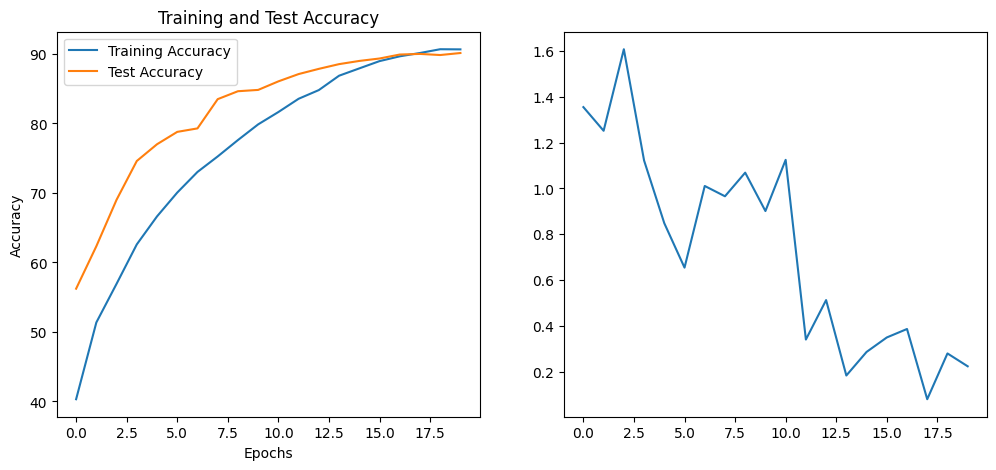

In [15]:
import matplotlib.pyplot as plt


epochs = range(len(train_accuracy))

# Create a new figure
plt.figure(figsize=(12, 5))

# Create a subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Create a subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the figure
plt.tight_layout()
plt.show()

Text(0, 0.5, 'learning rate')

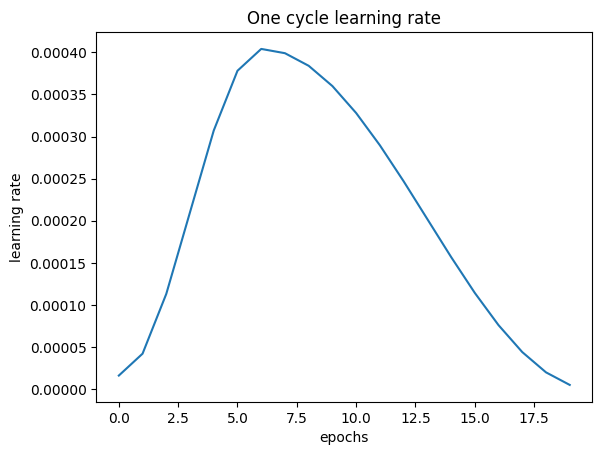

In [16]:
plt.plot(epochs, learning_rate)
plt.title('One cycle learning rate')
plt.xlabel('epochs')
plt.ylabel('learning rate')

In [17]:

torch.save(model.state_dict(), 'final_model.pth')

model = Net()

model.load_state_dict(torch.load('final_model.pth'))

model.eval()

Net(
  (PrepLayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (R1_c1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (R1_c2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock2): S

IndexError: ignored

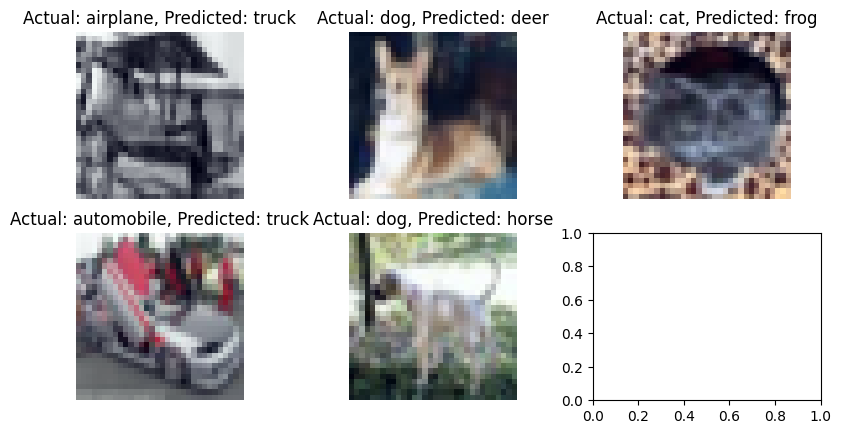

In [18]:
from utils import test_and_find_misclassified, display_misclassified_images
misclassified_images, misclassified_labels, misclassified_preds = test_and_find_misclassified(model, test_loader,torch.device('cpu'))
display_misclassified_images(misclassified_images[0][:12], misclassified_labels[0][:12], misclassified_preds[0][:12], 'Misclassified Images for Model')